# DAYCON COIN TRADER

### 암호화폐 가격 예측

#### 10가지 종류의 암호화폐 가격을 예측하여 가장 수익율이 높은 모델 만들기

#### 데이터셋

- **train_x_df** : 임의의 시점부터 2020년 12월 31일까지 10가지 종류의 암호화폐 분단위 정보를 가공한 데이터

- **train_y_df** : 임의의 시점부터 2020년 12월 31일까지 10가지 종류의 암호화폐 분단위 가격정보를 가공한 데이터

- **test_x_df** : 2021년 1월 1일부터 임의의 시점까지 10가지 종류의 암호화폐 분단위 가격정보를 가공한 데이터


- 학습용 데이터는 10가지 종류의 코인을 포함하는 7362가지의 sample이 담겨있으며 train_x_df는 입력 23시간 동안의 분단위 데이터, train_y_df는 출력 2시간 동안의 분단위 데이터이다.

- test_x는 train_x과 동일한 구성을 갖는 529가지의 sample을 의미하며 해당 sample_id에 대해 매수량(buy_quantity)와 매도 시점(sell_time)을 결정해야한다.

### 파일 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_path = 'D:/portfolio/open'
train_x_df = pd.read_csv(data_path + '/train_x_df.csv')
train_y_df = pd.read_csv(data_path + '/train_y_df.csv')
test_x_df = pd.read_csv(data_path + '/test_x_df.csv')

In [3]:
train_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,0,1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,0,2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,0,3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,0,4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000


In [4]:
train_y_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.000392,1.000588,1.000392,1.000588,8.305119e+05,42356.179688,137.308746,8.305119e+05,42356.179688
1,0,1,7,1.000588,1.001177,1.000392,1.001177,5.320066e+05,27140.638672,294.233032,4.882738e+05,24909.861328
2,0,2,7,1.001177,1.001177,1.001177,1.001177,5.113770e+05,26100.681641,58.846603,5.113770e+05,26100.681641
3,0,3,7,1.001177,1.001373,1.001177,1.001373,1.134853e+06,57929.410156,137.308746,1.095514e+06,55921.156250
4,0,4,7,1.000981,1.000981,0.999804,1.000196,5.801173e+06,295872.343750,666.928162,9.911239e+05,50528.589844


In [5]:
test_x_df.head()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,0,0,7,1.003541,1.007110,1.003541,1.006090,486928.96875,182543.687500,332.671570,287449.968750,107758.375000
1,0,1,7,1.006117,1.006331,1.004829,1.005634,824485.37500,309019.750000,407.790955,560290.250000,210005.125000
2,0,2,7,1.005929,1.005983,1.004266,1.005366,478614.56250,179301.843750,276.332031,214270.265625,80283.554688
3,0,3,7,1.005044,1.005956,1.004910,1.005795,334366.84375,125305.117188,166.335785,56401.246094,21135.490234
4,0,4,7,1.005580,1.006466,1.005285,1.005929,560916.68750,210316.796875,303.160370,138711.703125,52010.964844


### 변수 설명

|<center>변수명|<center>변수설명|
|:------:|:-------:|
|<center>**sample_id**| <center>개별 샘플의 인덱스|
|<center>**time**|<center>x_df는 0분 ~ 1379분, y_df는 0분 ~ 119분의 값. 동일한 샘플 내 시간 정보|
|<center>**coin_index**|<center>10가지 종류의 코인에 대한 비식별화 인덱스 (0 ~9)|
|<center>**open**|<center>open price|
|<center>**high**|<center>high price|
|<center>**low**|<center>low price|
|<center>**close**|<center>close price|
|<center>**volume**|<center>거래량|
|<center>**quote_av**|<center>quote asset volume|
|<center>**trades**|<center>거래 건 수|
|<center>**tb_base_av**|<center>taker buy base asset volume|
|<center>**tb_quote_av**|<center>taker buy quote asset volume|

In [6]:
train_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159560 entries, 0 to 10159559
Data columns (total 12 columns):
sample_id      int64
time           int64
coin_index     int64
open           float64
high           float64
low            float64
close          float64
volume         float64
quote_av       float64
trades         float64
tb_base_av     float64
tb_quote_av    float64
dtypes: float64(9), int64(3)
memory usage: 930.1 MB


In [7]:
train_y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883440 entries, 0 to 883439
Data columns (total 12 columns):
sample_id      883440 non-null int64
time           883440 non-null int64
coin_index     883440 non-null int64
open           883440 non-null float64
high           883440 non-null float64
low            883440 non-null float64
close          883440 non-null float64
volume         883440 non-null float64
quote_av       883440 non-null float64
trades         883440 non-null float64
tb_base_av     883440 non-null float64
tb_quote_av    883440 non-null float64
dtypes: float64(9), int64(3)
memory usage: 80.9 MB


In [8]:
test_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730020 entries, 0 to 730019
Data columns (total 12 columns):
sample_id      730020 non-null int64
time           730020 non-null int64
coin_index     730020 non-null int64
open           730020 non-null float64
high           730020 non-null float64
low            730020 non-null float64
close          730020 non-null float64
volume         730020 non-null float64
quote_av       730020 non-null float64
trades         730020 non-null float64
tb_base_av     730020 non-null float64
tb_quote_av    730020 non-null float64
dtypes: float64(9), int64(3)
memory usage: 66.8 MB


In [76]:
train_x_df.describe().round(2)

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,10159560.00,10159560.00,10159560.00,10159560.00,10159560.00,10159560.00,10159560.00,1.015956e+07,10159560.00,10159560.00,1.015956e+07,10159560.00
mean,3680.50,689.50,5.50,1.00,1.00,1.00,1.00,7.657862e+05,42689.07,117.97,3.647911e+05,21061.37
std,2125.23,398.37,2.94,0.04,0.04,0.04,0.04,9.341042e+06,214641.97,493.62,5.268894e+06,111790.13
min,0.00,0.00,0.00,0.09,0.55,0.09,0.55,0.000000e+00,0.00,0.00,0.000000e+00,0.00
25%,1840.00,344.75,4.00,0.99,0.99,0.99,0.99,5.000000e-02,31.26,0.08,1.000000e-02,10.66
50%,3680.50,689.50,6.00,1.00,1.00,1.00,1.00,3.230000e+00,322.02,0.78,1.040000e+00,115.27
75%,5521.00,1034.25,8.00,1.01,1.01,1.01,1.01,4.258415e+04,12544.63,56.42,9.016590e+03,4863.69
max,7361.00,1379.00,9.00,2.07,4.45,2.07,2.07,7.398036e+09,37054968.00,62578.62,7.340513e+09,23200226.00


In [10]:
train_y_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,883440.000000,883440.000000,883440.000000,883440.000000,883440.000000,883440.000000,883440.000000,8.834400e+05,8.834400e+05,883440.000000,8.834400e+05,8.834400e+05
mean,3680.500000,59.500000,5.495925,1.000065,1.000832,0.999272,1.000059,7.399341e+05,4.162687e+04,115.143382,3.529742e+05,2.053159e+04
std,2125.227524,34.639833,2.940006,0.012062,0.012122,0.012172,0.012157,8.463690e+06,1.924362e+05,443.679342,4.836148e+06,1.019837e+05
min,0.000000,0.000000,0.000000,0.776689,0.778169,0.760567,0.774648,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,1840.000000,29.750000,4.000000,0.996483,0.997047,0.995809,0.996422,5.079032e-02,3.136911e+01,0.077189,5.787930e-03,1.067757e+01
50%,3680.500000,59.500000,6.000000,1.000000,1.000416,0.999541,1.000000,3.267469e+00,3.230985e+02,0.783415,1.043598e+00,1.159318e+02
75%,5521.000000,89.250000,8.000000,1.003615,1.004268,1.003031,1.003666,4.219783e+04,1.261572e+04,56.521740,8.772491e+03,4.886511e+03
max,7361.000000,119.000000,9.000000,1.243545,1.249481,1.231673,1.243545,2.085937e+09,1.323100e+07,44132.230469,1.908554e+09,8.438416e+06


In [11]:
test_x_df.describe()

,sample_id,time,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
count,730020.000000,730020.000000,730020.000000,730020.000000,730020.000000,730020.000000,730020.000000,7.300200e+05,7.300200e+05,730020.000000,7.300200e+05,7.300200e+05
mean,264.000000,689.500000,4.491493,0.991427,0.993138,0.989688,0.991434,7.801768e+05,1.992196e+05,313.488285,3.903638e+05,9.925072e+04
std,152.708978,398.371854,2.868319,0.066288,0.066522,0.066000,0.066239,3.738390e+06,8.574118e+05,977.688953,2.005648e+06,4.268118e+05
min,0.000000,0.000000,0.000000,0.607767,0.609716,0.606567,0.608217,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,132.000000,344.750000,2.000000,0.963017,0.964617,0.961381,0.963066,8.064378e-01,5.264895e+02,0.607591,3.648973e-01,2.334793e+02
50%,264.000000,689.500000,4.000000,0.995372,0.996856,0.993898,0.995397,3.989354e+02,5.109016e+03,9.878845,1.658845e+02,2.198869e+03
75%,396.000000,1034.250000,7.000000,1.021444,1.023017,1.019826,1.021421,3.602226e+05,9.049191e+04,268.041229,1.446413e+05,4.106598e+04
max,528.000000,1379.000000,9.000000,2.129188,2.167028,1.950575,2.129188,4.738079e+08,9.179647e+07,79387.242188,2.255709e+08,3.681243e+07


In [12]:
train_x_df.shape

(10159560, 12)

### 암호화폐별 분류

- train_x데이터의 시간은 0~1379분까지 고유값은 7362개

- train_y데이터의 시간은 0~119분까지 고유값은 7362개

- test데이터의 시간은 0~1379분까지 고유값은 529개

In [21]:
train_x_df.iloc[:,2:].head()

,coin_index,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av
0,7,1.010004,1.010004,1.009612,1.010004,8.382875e+05,43160.632812,451.157288,7.326834e+05,37725.183594
1,7,1.009808,1.009808,1.009808,1.009808,1.622420e+05,8352.220703,39.231071,0.000000e+00,0.000000
2,7,1.009808,1.010200,1.009808,1.010200,1.664967e+04,857.377808,58.846603,1.664967e+04,857.377808
3,7,1.010200,1.011181,1.010200,1.011181,2.586971e+06,133310.343750,431.541779,2.189147e+06,112811.046875
4,7,1.010985,1.010985,1.010200,1.010200,1.129996e+06,58216.867188,176.539810,0.000000e+00,0.000000


In [44]:
def change_array(x) :
    coin_idx = x.iloc[:,2:].shape[1]
    time_idx = len(x.time.value_counts())
    sample_idx = len(x.sample_id.value_counts())
    array_df = x.iloc[:,2:].values.reshape([sample_idx,time_idx,coin_idx])
    return array_df

In [45]:
train_x_array = change_array(train_x_df)
train_y_array = change_array(train_y_df)
test_x_array = change_array(test_x_df)

암호화폐 10개의 시간(컬럼)별 데이터 정리<br>
(행(sample_idx), 열(시간),분단위 10가지 정보)

In [46]:
print(train_x_array.shape)
print(train_y_array.shape)
print(test_x_array.shape)

(7362, 1380, 10)
(7362, 120, 10)
(529, 1380, 10)


### 1번째 코인

In [107]:
# 전체 시간 = train 전체 시간 + test 전체 시간
def plot_series(x_series, y_series) :
    plt.plot(x_series)
    plt.plot(np.arange(len(x_series),len(y_series) + len(x_series)),y_series)

In [117]:
idx = 0 # sample_id
idx_col = 1 # 1 : open , 2 : high
x_series = train_x_array[idx,:,idx_col]
y_series = train_y_array[idx,:,idx_col]

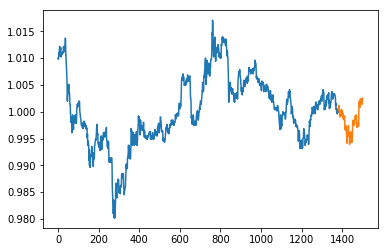

In [118]:
# 1번째 코인 train,test 그래프
plot_series(x_series,y_series)

### prophet

- 시계열 예측 라이브러리 활용

In [127]:
# data 날짜 추가
import datetime

start_time = "2020-12-31 00:00:00"
dt_time = datetime.datetime.strptime(start_time,"%Y-%m-%d %H:%M:%S")
dt_time

datetime.datetime(2020, 12, 31, 0, 0)

In [126]:
pd.date_range(start = "2020-12-31 00:00:00", end = len(train_x_df.time), freq = 'M')

DatetimeIndex([], dtype='datetime64[ns]', freq='M')

### arima 모형

In [ ]:
train_coin1_price = pd.DataFrame 

In [ ]:
# 5분 간격 차분 구하기
for w in range(1, 6) :
    train_coin1_price['shift_{}'.format(w)] = train_coin1_price['price'].shift(w)
    test_coin1_price['shift_{}'.format(w)] = test_coin1_price['price'].shift(w)